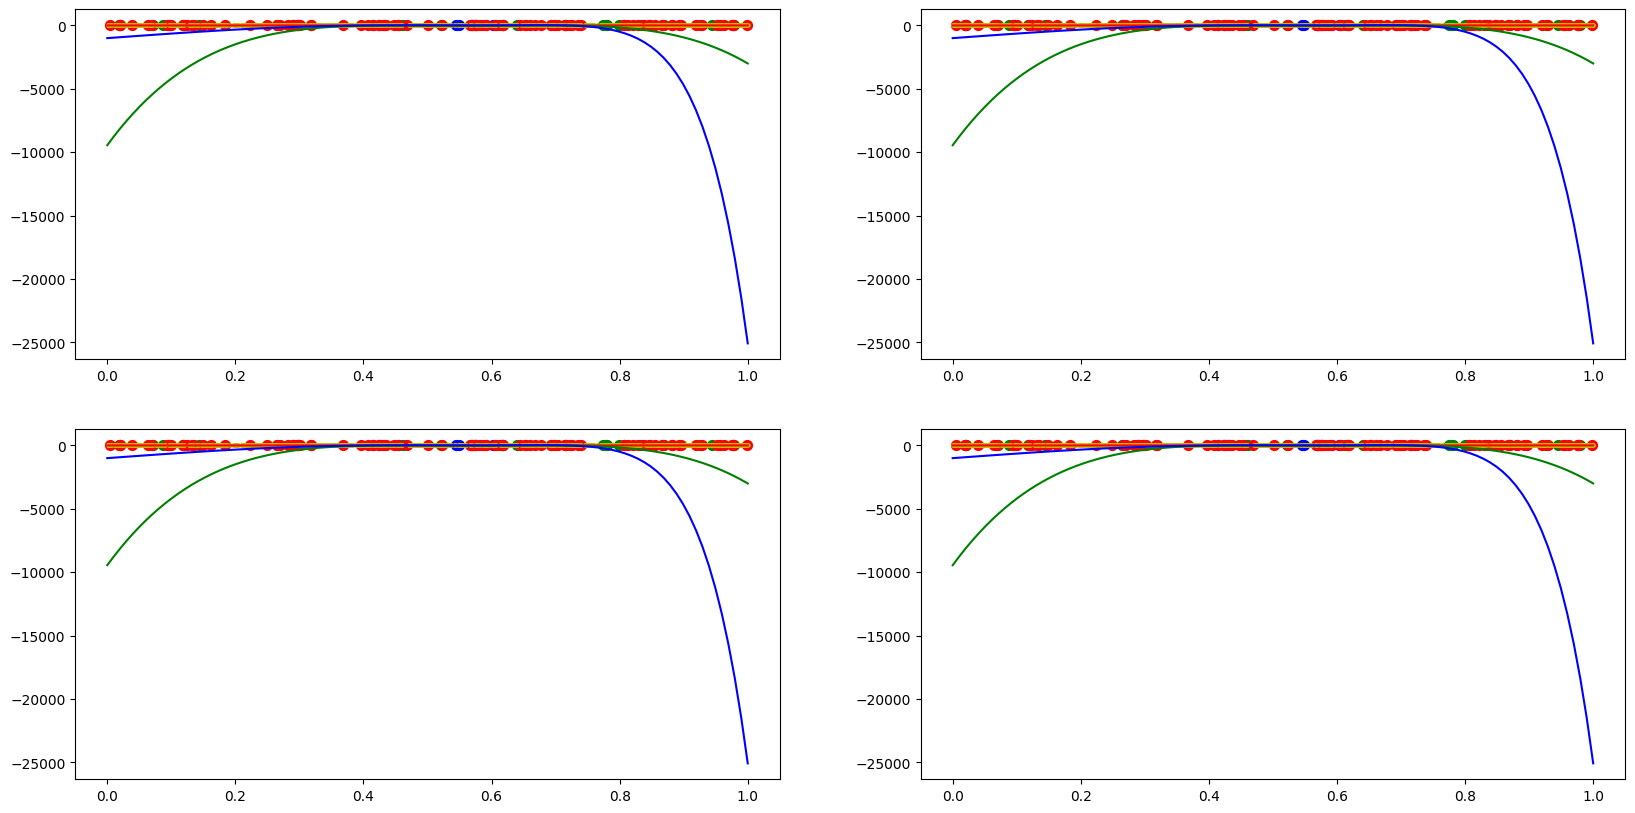

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# تولید مجموعه داده
np.random.seed(0)

# تولید یک مجموعه داده خطی با ۵ نمونه
X_5 = np.random.rand(5, 1)
y_5 = 1 + 2 * X_5.squeeze() + np.random.randn(5)

# تولید یک مجموعه داده خطی با ۲۵ نمونه
X_25 = np.random.rand(25, 1)
y_25 = 1 + 2 * X_25.squeeze() + np.random.randn(25)

# تولید یک مجموعه داده خطی با ۱۰۰ نمونه
X_100 = np.random.rand(100, 1)
y_100 = 1 + 2 * X_100.squeeze() + np.random.randn(100)

# تولید یک مجموعه داده خطی با ۱۰۰۰ نمونه
X_1000 = np.random.rand(1000, 1)
y_1000 = 1 + 2 * X_1000.squeeze() + np.random.randn(1000)

# تولید داده هایی برای نمودار
x_range = np.linspace(0, 1, 100).reshape(-1, 1)

# آموزش مدل
degrees = [1, 4, 16]
colors = ['r', 'g', 'b']

plt.figure(figsize=(20, 10))

for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    ax.scatter(x_range, 1 + 2 * x_range.squeeze(), color='orange', s=5)
    ax.scatter(X_5, y_5, color='b', s=50)
    ax.scatter(X_25, y_25, color='g', s=50)
    ax.scatter(X_100, y_100, color='r', s=50)
    ax.scatter(X_1000, y_1000, color='y', s=5)

    for degree, color in zip(degrees, colors):
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        X_5_poly = poly_features.fit_transform(X_5)
        X_25_poly = poly_features.fit_transform(X_25)
        X_100_poly = poly_features.fit_transform(X_100)
        X_1000_poly = poly_features.fit_transform(X_1000)
        x_range_poly = poly_features.fit_transform(x_range)

        lin_reg = LinearRegression()
        lin_reg.fit(X_5_poly, y_5)
        y_range = lin_reg.predict(x_range_poly)
        ax.plot(x_range, y_range, color, label=f'degree={degree}')

plt.show()
